In [1]:
import nshutils

nshutils.pretty()

In [2]:
from pathlib import Path

base_path = Path("/mnt/datasets/experiment-data/jmp-peft/nshtrainer/")

run_id = "rog61gn4"
run_dir = base_path / run_id
assert (
    run_dir.exists() and run_dir.is_dir()
), f"run_dir: {run_dir} does not exist or is not a directory"
print(run_dir)

if (snapshot_dir := next(run_dir.glob("./nshrunner/snapshots/*/"), None)) is not None:
    import nshrunner

    ctx = nshrunner.load_existing_snapshot(snapshot_dir, preserve_original_modules=True)
    print(ctx)
else:
    print("No snapshot found")

/mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4


[15:41:15] INFO     Module jmppeft: /workspaces/repositories/jmp-peft/src/jmppeft ->                   ]8;id=955368;file:///workspaces/nshrunner/src/nshrunner/snapshot/_load.py\_load.py]8;;\:]8;id=425905;file:///workspaces/nshrunner/src/nshrunner/snapshot/_load.py#275\275]8;;\
                    /mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/202             
                    40730143647--b58fd01f-2780-4203-b600-70978a2ceb5c/jmppeft                                      

           INFO     Symlinked /workspaces/repositories/jmp-peft/src/jmppeft to                         ]8;id=163932;file:///workspaces/nshrunner/src/nshrunner/snapshot/_load.py\_load.py]8;;\:]8;id=785634;file:///workspaces/nshrunner/src/nshrunner/snapshot/_load.py#196\196]8;;\
                    /tmp/nshrunner_snapshot_original_modules_xqqqxl7g/jmppeft_original                             

           CRITICAL Loading the following modules from                                                 ]8;id=762750;file:///workspaces/nshrunner/src/nshrunner/snapshot/_load.py\_load.py]8;;\:]8;id=827250;file:///workspaces/nshrunner/src/nshrunner/snapshot/_load.py#174\174]8;;\
                    /mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/202             
                    40730143647--b58fd01f-2780-4203-b600-70978a2ceb5c: jmppeft                                     

           CRITICAL Loading the following modules from                                                 ]8;id=380121;file:///workspaces/nshrunner/src/nshrunner/snapshot/_load.py\_load.py]8;;\:]8;id=597138;file:///workspaces/nshrunner/src/nshrunner/snapshot/_load.py#174\174]8;;\
                    /tmp/nshrunner_snapshot_original_modules_xqqqxl7g: jmppeft                                     

           INFO     Added                                                                               ]8;id=831618;file:///workspaces/nshrunner/src/nshrunner/snapshot/_load.py\_load.py]8;;\:]8;id=99277;file:///workspaces/nshrunner/src/nshrunner/snapshot/_load.py#70\70]8;;\
                    /mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/2024            
                    0730143647--b58fd01f-2780-4203-b600-70978a2ceb5c,                                              
                    /tmp/nshrunner_snapshot_original_modules_xqqqxl7g to sys.path.                                 

In [6]:
import jmppeft

print(jmppeft.__file__)

import jmppeft_original

print(Path(jmppeft_original.__file__).resolve())

/mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/20240730143647--b58fd01f-2780-4203-b600-70978a2ceb5c/jmppeft/__init__.py
/workspaces/repositories/jmp-peft/src/jmppeft/__init__.py


In [3]:
import os

os.environ["LL_DISABLE_TYPECHECKING"] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"


import torch

torch.no_grad().__enter__()
torch.inference_mode().__enter__()

device = torch.device("cuda:0")
default_dtype = torch.float32

In [4]:
from jmppeft.tasks.finetune import matbench_discovery as M

ckpt_path = (run_dir / "checkpoint" / "latest.ckpt").resolve()
model = M.MatbenchDiscoveryModel.load_checkpoint(ckpt_path, map_location=device)
model = model.to(device, dtype=default_dtype)
model

           CRITICAL Type checking the following modules: ('jmppeft',)                               ]8;id=257360;file:///opt/conda/envs/jmp-peft/lib/python3.11/site-packages/nshutils/typecheck.py\typecheck.py]8;;\:]8;id=220174;file:///opt/conda/envs/jmp-peft/lib/python3.11/site-packages/nshutils/typecheck.py#76\76]8;;\

[14:23:49] INFO     PyTorch version 2.2.1 available.                                                   ]8;id=344310;file:///opt/conda/envs/jmp-peft/lib/python3.11/site-packages/datasets/config.py\config.py]8;;\:]8;id=890985;file:///opt/conda/envs/jmp-peft/lib/python3.11/site-packages/datasets/config.py#58\58]8;;\

/opt/conda/envs/jmp-peft/lib/python3.11/site-packages/lightning/pytorch/utilities/migration/utils.py:56: The loaded checkpoint was produced with Lightning v2.3.1, which is newer than your current Lightning version: v2.2.1


[14:23:51] WARNING  NSHRUNNER_SESSION_DIR is not set. Skipping symlink creation.                      ]8;id=954576;file:///opt/conda/envs/jmp-peft/lib/python3.11/site-packages/nshtrainer/model/config.py\config.py]8;;\:]8;id=127672;file:///opt/conda/envs/jmp-peft/lib/python3.11/site-packages/nshtrainer/model/config.py#621\621]8;;\

           WARNING  NSHRUNNER_SESSION_DIR is not set. Skipping symlink creation.                      ]8;id=954065;file:///opt/conda/envs/jmp-peft/lib/python3.11/site-packages/nshtrainer/model/config.py\config.py]8;;\:]8;id=376611;file:///opt/conda/envs/jmp-peft/lib/python3.11/site-packages/nshtrainer/model/config.py#621\621]8;;\

           WARNING  NSHRUNNER_SESSION_DIR is not set. Skipping symlink creation.                      ]8;id=244158;file:///opt/conda/envs/jmp-peft/lib/python3.11/site-packages/nshtrainer/model/config.py\config.py]8;;\:]8;id=390991;file:///opt/conda/envs/jmp-peft/lib/python3.11/site-packages/nshtrainer/model/config.py#621\621]8;;\

           WARNING  NSHRUNNER_SESSION_DIR is not set. Skipping symlink creation.                      ]8;id=816328;file:///opt/conda/envs/jmp-peft/lib/python3.11/site-packages/nshtrainer/model/config.py\config.py]8;;\:]8;id=429953;file:///opt/conda/envs/jmp-peft/lib/python3.11/site-packages/nshtrainer/model/config.py#621\621]8;;\

           CRITICAL Using regular backbone                                                              ]8;id=283667;file:///mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/20240730143647--b58fd01f-2780-4203-b600-70978a2ceb5c/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=861978;file:///mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/20240730143647--b58fd01f-2780-4203-b600-70978a2ceb5c/jmppeft/tasks/finetune/base.py#611\611]8;;\

Unrecognized arguments:  dict_keys(['name', 'learnable_rbf', 'learnable_rbf_stds', 'unique_basis_per_layer', 'dropout', 'edge_dropout', 'ln_per_layer', 'scale_factor_to_ln'])


           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=86379;file:///mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/20240730143647--b58fd01f-2780-4203-b600-70978a2ceb5c/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=86201;file:///mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/20240730143647--b58fd01f-2780-4203-b600-70978a2ceb5c/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=186895;file:///mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/20240730143647--b58fd01f-2780-4203-b600-70978a2ceb5c/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=915069;file:///mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/20240730143647--b58fd01f-2780-4203-b600-70978a2ceb5c/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=883718;file:///mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/20240730143647--b58fd01f-2780-4203-b600-70978a2ceb5c/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=158727;file:///mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/20240730143647--b58fd01f-2780-4203-b600-70978a2ceb5c/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

[14:23:52] INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=415251;file:///mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/20240730143647--b58fd01f-2780-4203-b600-70978a2ceb5c/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=823796;file:///mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/20240730143647--b58fd01f-2780-4203-b600-70978a2ceb5c/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=306461;file:///mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/20240730143647--b58fd01f-2780-4203-b600-70978a2ceb5c/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=502377;file:///mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/20240730143647--b58fd01f-2780-4203-b600-70978a2ceb5c/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=441588;file:///mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/20240730143647--b58fd01f-2780-4203-b600-70978a2ceb5c/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=222284;file:///mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/20240730143647--b58fd01f-2780-4203-b600-70978a2ceb5c/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=419971;file:///mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/20240730143647--b58fd01f-2780-4203-b600-70978a2ceb5c/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=883173;file:///mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/20240730143647--b58fd01f-2780-4203-b600-70978a2ceb5c/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

[14:23:53] CRITICAL Constructed backbone with dlora=None                                                ]8;id=713288;file:///mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/20240730143647--b58fd01f-2780-4203-b600-70978a2ceb5c/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=481055;file:///mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/20240730143647--b58fd01f-2780-4203-b600-70978a2ceb5c/jmppeft/tasks/finetune/base.py#622\622]8;;\

           INFO     Registered 12 shared parameters                                         ]8;id=425856;file:///opt/conda/envs/jmp-peft/lib/python3.11/site-packages/nshtrainer/model/modules/shared_parameters.py\shared_parameters.py]8;;\:]8;id=485303;file:///opt/conda/envs/jmp-peft/lib/python3.11/site-packages/nshtrainer/model/modules/shared_parameters.py#72\72]8;;\

           INFO     List of ignored parameters: []                                                      ]8;id=782382;file:///mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/20240730143647--b58fd01f-2780-4203-b600-70978a2ceb5c/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=980894;file:///mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/20240730143647--b58fd01f-2780-4203-b600-70978a2ceb5c/jmppeft/tasks/finetune/base.py#700\700]8;;\

           CRITICAL Freezing 0 parameters (0.00%) out of 43,146,824 total parameters (43,146,824        ]8;id=470959;file:///mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/20240730143647--b58fd01f-2780-4203-b600-70978a2ceb5c/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=985877;file:///mnt/datasets/experiment-data/jmp-peft/nshtrainer/rog61gn4/nshrunner/snapshots/20240730143647--b58fd01f-2780-4203-b600-70978a2ceb5c/jmppeft/tasks/finetune/base.py#929\929]8;;\
                    trainable)                                                                                     

MatbenchDiscoveryModel(config=MatbenchDiscoveryConfig(name=mptrj-jmps-bsz40-linrefenergy-lr8e-05-ln-direct-maceenergy-maceforce-rele-ec5.0-fc10.0-sc100.0-posaug_std0.01, project=jmp_mptrj), device=cuda:0)

In [5]:
from jmppeft.tasks.finetune.base import FinetuneMatBenchDiscoveryIS2REDatasetConfig

dataset_config = FinetuneMatBenchDiscoveryIS2REDatasetConfig(
    # sample_n=DatasetSampleNConfig(sample_n=16, seed=42)
)
print(dataset_config)

dataset_og = dataset_config.create_dataset()
dataset_og, len(dataset_og)


Loading 'wbm_summary' from cached file at '/root/.cache/matbench-discovery/1.0.0/wbm/2023-12-13-wbm-summary.csv.gz'


(<jmppeft.datasets.mpd_is2re.MatBenchDiscoveryIS2REDataset at 0x7f6cb1936e90>,
 256963)

In [6]:
from collections import Counter

import jmppeft.modules.dataset.dataset_transform as DT
import nshutils
import rich
import torch.utils._pytree as tree
from lightning.fabric.utilities.apply_func import move_data_to_device
from torch_geometric.data import Batch, Data

nshutils.pretty()


def data_transform(data: Data):
    data = model.data_transform(data)
    data = Data.from_dict(
        tree.tree_map(
            lambda x: x.type(default_dtype)
            if torch.is_tensor(x) and torch.is_floating_point(x)
            else x,
            data.to_dict(),
        )
    )
    return data


def composition(data: Batch):
    return dict(Counter(data.atomic_numbers.tolist()))


num_items = 1024

dataset = DT.transform(dataset_og, data_transform)
dataset = DT.sample_n_transform(dataset, n=num_items, seed=42)


idx = 32
data = Batch.from_data_list([dataset[idx]])
rich.print(data.to_dict(), composition(data))

{
    'pos': tensor[11, 3] n=33 x∈[-4.291, 6.946] μ=1.411 σ=2.424,
    'id': ['wbm-3-72883'],
    'atomic_numbers': tensor[11] i64 x∈[50, 79] μ=62.000 σ=14.269,
    'cell': tensor[1, 3, 3] n=9 x∈[-3.509, 6.938] μ=1.065 σ=4.112 [[[6.029, 0., -3.509], [-2.037, 5.674, -3.509], 
[0., 0., 6.938]]],
    'y_formation': tensor[1] [-0.236],
    'y_formation_correction': tensor[1] [0.],
    'y_above_hull': tensor[1] [0.093],
    'natoms': tensor[1] i64 [11],
    'pos_noise': tensor[11, 3] n=33 x∈[-0.020, 0.018] μ=-0.001 σ=0.008,
    'tags': tensor[11] i64 x∈[2, 2] μ=2.000 σ=0.,
    'fixed': tensor[11] bool all_zeros,
    'batch': tensor[11] i64 all_zeros,
    'ptr': tensor[2] i64 μ=5.500 σ=7.778 [0, 11]
}
{66: 1, 50: 6, 79: 4}

In [7]:
import numpy as np
from jmppeft.modules.relaxer import ModelOutput, Relaxer
from matbench_discovery.energy import get_e_form_per_atom

LINREF = np.load("/workspaces/repositories/jmp-peft/notebooks/mptrj_linref.npy")


def model_fn(data, initial_data, *, use_y_relaxed: bool) -> ModelOutput:
    model_out = model.forward_denormalized(data)

    # energy = model_out["y_relaxed"] if use_y_relaxed else model_out["y"]
    energy = model_out["y"]
    relaxed_energy = model_out["y_relaxed"]
    forces = model_out["force"]
    stress = model_out["stress"]

    # Undo the linref
    if LINREF is not None:
        energy = energy + LINREF[data.atomic_numbers.cpu().numpy()].sum()
        relaxed_energy = (
            relaxed_energy + LINREF[data.atomic_numbers.cpu().numpy()].sum()
        )

    # JMP-S v2 energy is corrected_energy, i.e., DFT total energy
    # This energy is now DFT total energy, we need to convert it to formation energy per atom
    energy = get_e_form_per_atom(
        {
            "composition": composition(data),
            "energy": energy,
        }
    )
    relaxed_energy = get_e_form_per_atom(
        {
            "composition": composition(data),
            "energy": relaxed_energy,
        }
    )
    assert isinstance(energy, torch.Tensor)
    assert isinstance(relaxed_energy, torch.Tensor)

    # Add the correction factor
    if False:
        energy += initial_data.y_formation_correction.item()

    # energy, relaxed_energy = tree.tree_map(
    #     lambda energy: energy.view(1), (energy, relaxed_energy)
    # )
    energy = energy.view(1)
    relaxed_energy = relaxed_energy.view(1)
    forces = forces.view(-1, 3)
    stress = stress.view(1, 3, 3) if stress.numel() == 9 else stress.view(1, 6)

    return {
        "current_energy": energy,
        "relaxed_energy": relaxed_energy,
        "energy": relaxed_energy if use_y_relaxed else energy,
        "forces": forces,
        "stress": stress,
    }


data = move_data_to_device(data, model.device)
model_fn(data, data, use_y_relaxed=False)

{'current_energy': tensor[1] cuda:0 [0.155],
 'relaxed_energy': tensor[1] cuda:0 [-0.173],
 'energy': tensor[1] cuda:0 [0.155],
 'forces': tensor[11, 3] n=33 x∈[-0.848, 0.838] μ=0.002 σ=0.380 cuda:0,
 'stress': tensor[1, 3, 3] n=9 x∈[-0.133, -0.002] μ=-0.046 σ=0.064 cuda:0 [[[-0.130, -0.002, -0.004], [-0.002, -0.131, -0.005], [-0.004, -0.005, -0.133]]]}

In [8]:
from functools import partial

import rich
from jmppeft.modules.relaxer import RelaxerConfig

config = RelaxerConfig(
    compute_stress=True,
    stress_weight=0.1,
    optimizer="FIRE",
    fmax=0.05,
    ase_filter="exp",
)
relaxer = Relaxer(
    config=config,
    model=partial(model_fn, use_y_relaxed=False),
    collate_fn=model.collate_fn,
    device=model.device,
)
rich.print(data.y_formation)
relax_out = relaxer.relax(data)
# rich.print(relax_out)

energy = relax_out.atoms.get_total_energy()
rich.print(energy, data.y_formation)

tensor[1] cuda:0 [-0.236]

      Step     Time          Energy          fmax
FIRE:    0 14:24:22        0.155376        3.167624
FIRE:    1 14:24:22       -0.060239        1.408496
FIRE:    2 14:24:22       -0.119575        0.505123
FIRE:    3 14:24:22       -0.121074        0.505429
FIRE:    4 14:24:22       -0.124505        0.521099
FIRE:    5 14:24:22       -0.127669        0.519939
FIRE:    6 14:24:22       -0.129794        0.517050
FIRE:    7 14:24:23       -0.131555        0.503964
FIRE:    8 14:24:23       -0.131999        0.488141
FIRE:    9 14:24:23       -0.132119        0.477358
FIRE:   10 14:24:23       -0.132887        0.463058
FIRE:   11 14:24:23       -0.135566        0.443211
FIRE:   12 14:24:23       -0.141130        0.414212
FIRE:   13 14:24:23       -0.151295        0.399875
FIRE:   14 14:24:23       -0.159267        0.396879
FIRE:   15 14:24:23       -0.167595        0.387608
FIRE:   16 14:24:23       -0.174990        0.365853
FIRE:   17 14:24:23       -0.183978        0.360863
FIRE:   18 14:

-0.224134624004364 tensor[1] cuda:0 [-0.236]

In [9]:
import copy


def relax_and_return_structure(
    relaxer: Relaxer,
    graph: Batch,
    device: str | torch.device | None = None,
    verbose: bool = True,
):
    out_graph = copy.deepcopy(graph)
    output = relaxer.relax(graph, verbose=verbose)

    atoms = output.atoms
    # Convert the relaxed structure to a graph
    out_graph.pos = torch.tensor(
        atoms.positions,
        dtype=out_graph.pos.dtype,
        device=out_graph.pos.device,
    )
    out_graph.cell = torch.tensor(
        atoms.cell.array,
        dtype=out_graph.cell.dtype,
        device=out_graph.cell.device,
    ).reshape_as(out_graph.cell)

    out_graph.y_prediction = torch.tensor(
        atoms.get_total_energy(),
        dtype=torch.float,
        device=out_graph.pos.device,
    ).view(-1)

    if device is not None:
        out_graph = cast(Batch, move_data_to_device(out_graph, device))

    return out_graph, output

In [10]:
from collections import defaultdict
from functools import partial
from typing import TypedDict, cast

import numpy as np
from jmppeft.modules.relaxer import RelaxationOutput
from torch.utils.data import DataLoader
from torch_geometric.data import Batch
from tqdm.auto import tqdm

use_y_relaxed = True

config = RelaxerConfig(
    compute_stress=True,
    stress_weight=0.1,
    optimizer="FIRE",
    # fmax=0.01,
    # ase_filter="frechet",
    fmax=0.05,
    ase_filter="exp",
)
relaxer = Relaxer(
    config=config,
    model=partial(model_fn, use_y_relaxed=use_y_relaxed),
    collate_fn=model.collate_fn,
    device=model.device,
)

dl = DataLoader(
    dataset,
    batch_size=1,
    collate_fn=model.collate_fn,
    shuffle=False,
    num_workers=0,
    pin_memory=True,
)

preds_targets = defaultdict[str, list[tuple[float, float]]](lambda: [])
mae_error = 0.0
mae_count = 0


class ProblematicSample(TypedDict):
    error: float
    initial_data: Batch
    relaxed_data: Batch
    relax_out: RelaxationOutput


problematic_samples: list[ProblematicSample] = []
ae_threshold = 0.1

for data in tqdm(dl, total=len(dl)):
    data = cast(Batch, data)
    data = move_data_to_device(data, model.device)
    data.y_prediction = data.y_formation
    relaxed_data, relax_out = relax_and_return_structure(relaxer, data, verbose=False)

    e_form_true = data.y_formation.item()
    e_form_pred = relax_out.atoms.get_total_energy()
    preds_targets["e_form"].append((e_form_pred, e_form_true))

    e_above_hull_true = data.y_above_hull.item()
    e_above_hull_pred = e_above_hull_true + (e_form_pred - e_form_true)
    preds_targets["e_above_hull"].append((e_above_hull_pred, e_above_hull_true))

    mae_error += abs(e_form_pred - e_form_true)
    mae_count += 1
    mae_running = mae_error / mae_count

    nsteps = len(relax_out.trajectory.frames)

    error = abs(e_form_pred - e_form_true)
    prefix = "✅"
    if error > ae_threshold:
        problematic_samples.append(
            {
                "error": error,
                "initial_data": move_data_to_device(data, "cpu"),
                "relaxed_data": move_data_to_device(relaxed_data, "cpu"),
                "relax_out": move_data_to_device(relax_out, "cpu"),
            }
        )
        prefix = "❌"

    print(
        f"{prefix} # Steps: {nsteps}; e_form: P={e_form_pred:.4f}, GT={e_form_true:.4f}, Δ={abs(e_form_pred - e_form_true):.4f}, MAE={mae_running:.4f}"
    )

  0%|          | 0/1024 [00:00<?, ?it/s]

✅ # Steps: 21; e_form: P=-0.8299, GT=-0.8008, Δ=0.0291, MAE=0.0291
✅ # Steps: 20; e_form: P=-0.0134, GT=-0.0220, Δ=0.0086, MAE=0.0188
✅ # Steps: 15; e_form: P=-0.6278, GT=-0.6088, Δ=0.0191, MAE=0.0189
❌ # Steps: 82; e_form: P=-0.3170, GT=-0.1544, Δ=0.1626, MAE=0.0548
❌ # Steps: 48; e_form: P=-0.3227, GT=-0.1154, Δ=0.2072, MAE=0.0853
✅ # Steps: 17; e_form: P=-0.3821, GT=-0.3905, Δ=0.0084, MAE=0.0725
✅ # Steps: 13; e_form: P=-0.3002, GT=-0.2468, Δ=0.0535, MAE=0.0698
✅ # Steps: 11; e_form: P=-0.5277, GT=-0.4542, Δ=0.0735, MAE=0.0702
✅ # Steps: 19; e_form: P=-1.9960, GT=-1.9089, Δ=0.0871, MAE=0.0721
✅ # Steps: 6; e_form: P=-0.1372, GT=-0.1224, Δ=0.0149, MAE=0.0664
✅ # Steps: 5; e_form: P=-1.9090, GT=-1.8781, Δ=0.0309, MAE=0.0632
✅ # Steps: 11; e_form: P=-1.6070, GT=-1.6101, Δ=0.0031, MAE=0.0582
✅ # Steps: 15; e_form: P=-1.8727, GT=-1.8180, Δ=0.0548, MAE=0.0579
✅ # Steps: 2; e_form: P=-0.3575, GT=-0.3333, Δ=0.0242, MAE=0.0555
✅ # Steps: 13; e_form: P=-0.7199, GT=-0.7299, Δ=0.0101, MAE=0.052

In [11]:
import ase
import ase.visualize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_theme()


class UpdatedProblematicSample(TypedDict):
    error: float
    initial_data: Batch
    relaxed_data: Batch
    relax_out: RelaxationOutput

    s2e_energies: list[float]
    s2re_energies: list[float]


def _update_sample(sample: ProblematicSample) -> UpdatedProblematicSample:
    relax_out = sample["relax_out"]

    initial_data = move_data_to_device(
        copy.deepcopy(sample["initial_data"]), model.device
    )
    data = move_data_to_device(copy.deepcopy(sample["initial_data"]), model.device)

    s2e_energies = []
    s2re_energies = []
    for f in tqdm(relax_out.trajectory.frames):
        data.pos = f.pos.type_as(data.pos).reshape_as(data.pos).to(data.pos.device)
        data.cell = f.cell.type_as(data.cell).reshape_as(data.cell).to(data.cell.device)

        out = model_fn(data, initial_data, use_y_relaxed=True)
        # yield out["energy"].item()
        s2e_energies.append(out["current_energy"].item())
        s2re_energies.append(out["relaxed_energy"].item())

    return {**sample, "s2e_energies": s2e_energies, "s2re_energies": s2re_energies}


def plot_energy_vs_steps(sample: UpdatedProblematicSample, ax: plt.Axes | None = None):
    initial_data = sample["initial_data"]

    e_form_true = initial_data.y_formation.item()

    if ax is None:
        _, ax = plt.subplots()
    ax.plot(sample["s2e_energies"], label="S2E Pred")
    ax.plot(sample["s2re_energies"], label="S2RE Pred")
    ax.axhline(y=e_form_true, color="r", linestyle="--", label="True")

    ax.set_xlabel("Step")
    ax.set_ylabel("Formation Energy")
    ax.legend()

    return ax


def plot_initial_structure(sample: ProblematicSample):
    initial_data = sample["initial_data"]
    atoms = ase.Atoms(
        numbers=initial_data.atomic_numbers.cpu().numpy(),
        positions=initial_data.pos.cpu().numpy(),
        cell=initial_data.cell.cpu().squeeze(0).numpy(),
        pbc=[True, True, True],
    )

    return ase.visualize.view(atoms, viewer="ngl")


def plot_trajectory(sample: ProblematicSample):
    initial_data = move_data_to_device(copy.deepcopy(sample["initial_data"]), "cpu")
    atoms_list = [
        ase.Atoms(
            numbers=initial_data.atomic_numbers.cpu().numpy(),
            positions=f.pos.cpu().numpy(),
            cell=f.cell.cpu().squeeze(0).numpy(),
            pbc=[True, True, True],
        )
        for f in sample["relax_out"].trajectory.frames
    ]

    return ase.visualize.view(atoms_list, viewer="ngl")


def debug_system(idx: int, figsize: tuple[int, int] = (3, 2)):
    sample = problematic_samples[idx]
    updated_sample = _update_sample(sample)

    # display(plot_initial_structure(updated_sample))
    display(plot_trajectory(updated_sample))

    fig, ax = plt.subplots(figsize=figsize)
    plot_energy_vs_steps(updated_sample, ax=ax)
    plt.show()

Max error index: 45, error: 0.8655839562416077


  0%|          | 0/128 [00:00<?, ?it/s]

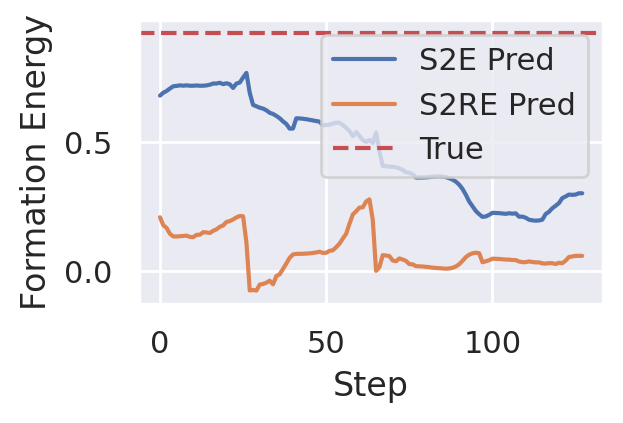

In [13]:
max_error_idx = np.argmax([s["error"] for s in problematic_samples])
print(
    f"Max error index: {max_error_idx}, error: {problematic_samples[max_error_idx]['error']}"
)
debug_system(max_error_idx)

index: 6, error: 0.27349376678466797


  0%|          | 0/21 [00:00<?, ?it/s]

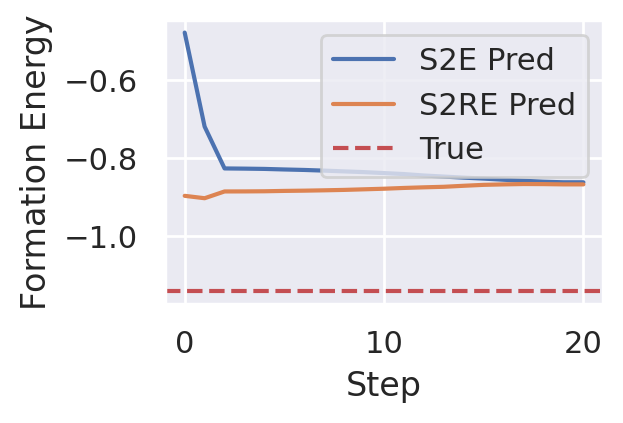

In [12]:
idx = 10
max_error_idx = np.argsort([s["error"] for s in problematic_samples])[-idx]
print(f"index: {max_error_idx}, error: {problematic_samples[max_error_idx]['error']}")
debug_system(max_error_idx)

index: 25, error: 0.25337085127830505


  0%|          | 0/7 [00:00<?, ?it/s]

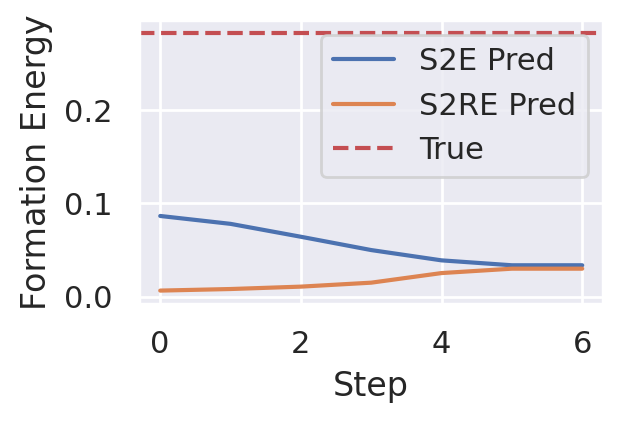

In [13]:
idx = 12
max_error_idx = np.argsort([s["error"] for s in problematic_samples])[-idx]
print(f"index: {max_error_idx}, error: {problematic_samples[max_error_idx]['error']}")
debug_system(max_error_idx)

In [14]:
# Sort by error
problematic_samples_sorted = sorted(
    problematic_samples,
    key=lambda x: len(x["relax_out"].trajectory.frames),
    reverse=True,
)
for i, sample in enumerate(problematic_samples_sorted):
    print(
        f"Index: {i}, Error: {sample['error']:.4f}, # Steps: {len(sample['relax_out'].trajectory.frames)}"
    )
    display(plot_trajectory(sample))

    if i == 10:
        break

In [15]:
datas_to_export = []

# Sort by error
problematic_samples_sorted = sorted(
    problematic_samples,
    key=lambda x: len(x["relax_out"].trajectory.frames),
    reverse=True,
)
for i, sample in enumerate(tqdm(problematic_samples_sorted)):
    updated_sample = _update_sample(sample)

    datas_to_export.append(
        {
            "s2e_energies": updated_sample["s2e_energies"],
            "s2re_energies": updated_sample["s2re_energies"],
            "atoms": [
                ase.Atoms(
                    numbers=updated_sample["initial_data"].atomic_numbers.cpu().numpy(),
                    positions=f.pos.cpu().numpy(),
                    cell=f.cell.cpu().squeeze(0).numpy(),
                    pbc=[True, True, True],
                ).todict()
                for f in updated_sample["relax_out"].trajectory.frames
            ],
            "true_formation_energy": updated_sample["initial_data"].y_formation.item(),
            "true_above_hull_energy": updated_sample[
                "initial_data"
            ].y_above_hull.item(),
            "error": updated_sample["error"],
        }
    )

  0%|          | 0/73 [00:00<?, ?it/s]

  0%|          | 0/128 [00:00<?, ?it/s]

  0%|          | 0/95 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/82 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [20]:
# Forgot to add the true formation energy, true above hull energy, and error

# datas_to_export_with_true = []
for sample, data in zip(problematic_samples_sorted, datas_to_export):
    # data["true_formation_energy"] = sample["initial_data"].y_formation.item()
    # data["true_above_hull_energy"] = sample["initial_data"].y_above_hull.item()
    # data["error"] = abs(data["true_formation_energy"] - data["s2re_energies"][-1])
    np.testing.assert_allclose(data["error"], sample["error"], rtol=1e-4, atol=1e-4)

    # datas_to_export_with_true.append(data)

In [16]:
import pickle

with open("problematic_samples.relaxdata.pkl", "wb") as f:
    pickle.dump(datas_to_export, f)

# print the file size
!ls -lh problematic_samples.relaxdata.pkl

  × could not find pixi.toml or pyproject.toml which is configured to use pixi

-rw-r--r-- 1 root root 758K Aug  1 14:41 problematic_samples.relaxdata.pkl
